In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px


In [ ]:
train = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [ ]:
train.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.shape

(16719, 16)

In [ ]:
train.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
                    ...   
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Length: 16, dtype: object

In [ ]:
train.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
                   ... 
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
Length: 16, dtype: int64

In [ ]:
# drop null-name
#Year of release=0
#genre- domain knowledge
#publisher= 'Unknown'
#Critic score- publisher wise, average scores
#critic count- drop
#user score- sales replicated into categories, each category's average user score is assigned to NA values
#user count-drop
#developer='Unknown'
#Rating= 'N' for not available

In [ ]:
train=train.dropna(subset=["Name"])
train["Year_of_Release"] = train["Year_of_Release"].fillna(0)
train["Publisher"] = train["Publisher"].fillna("Unknown")
train = train.drop(columns=["Critic_Count","User_Count"])
train["Developer"] = train["Developer"].fillna("Unknown")
train["Rating"] = train["Rating"].fillna("N")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Publisher_score = train.groupby("Publisher",as_index = False).agg({"Critic_Score":"mean"})
#Publisher_score["Critic_Score"] = Publisher_score["Critic_Score"].fillna("Not Available")
train["Critic_Score"] = train["Critic_Score"].fillna(train.groupby("Publisher")["Critic_Score"].transform("mean"))


In [ ]:
train["Critic_Score"] = train["Critic_Score"].fillna(0)

In [ ]:
bins = [0.0, 0.533, 2.073, 3.613, 5.153,10,20,30,np.inf]
names = ['<0.5', '0.5-2', '2-3.5', '3.5-5','5-10','10-20','20-30','30+']
train["Sales_Distribution"] = pd.cut(train["Global_Sales"],bins,labels=names)
train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating,Sales_Distribution
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,8.0,Nintendo,E,30+
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,75.525806,NaN,Unknown,N,30+
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,8.3,Nintendo,E,30+
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,8.0,Nintendo,E,30+
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,75.525806,NaN,Unknown,N,30+


In [ ]:
train["User_Score"] = train["User_Score"].fillna(train.groupby("Sales_Distribution")["User_Score"].transform("mean"))


##Exploratory data analysis


In [ ]:
Platform_sales = train.groupby("Platform",as_index="False").agg({"Global_Sales":"sum"}).reset_index()
Platform_sales

,Platform,Global_Sales
0,2600,97.08
1,3DO,0.10
2,3DS,259.09
3,DC,15.97
4,DS,807.10
...,...,...
26,Wii,908.13
27,WiiU,82.16
28,X360,971.63
29,XB,258.26


In [ ]:

fig=plt.figure(figsize=(18, 6), dpi=80)
fig=px.bar(x=Platform_sales["Platform"],y=Platform_sales["Global_Sales"])
fig.show()

<Figure size 1440x480 with 0 Axes>

Enter the number of top n sales you want to see4


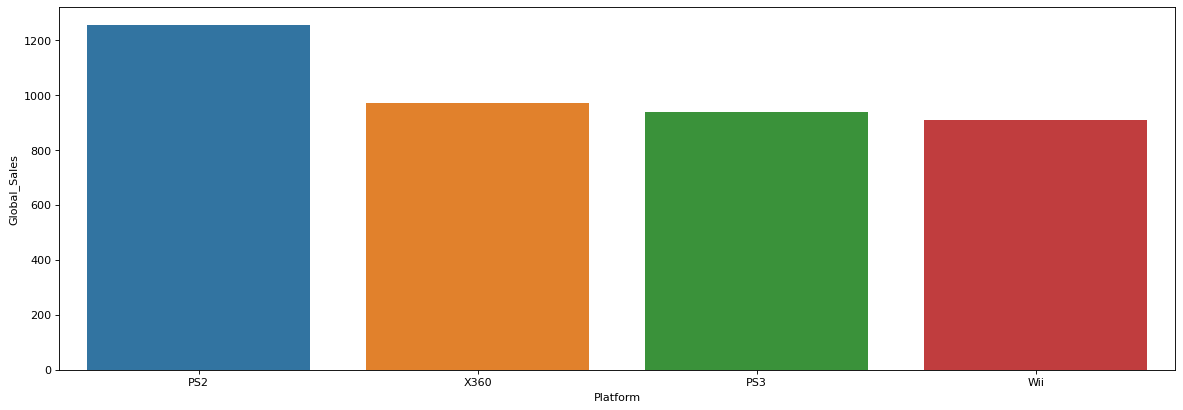

In [ ]:
#Querying top n sales by platform
plt.figure(figsize=(18, 6), dpi=80)

top_items = int(input("Enter the number of top n sales you want to see"))
if top_items > 31:
  print("There are only 31 platforms so displaying all the 31 platforms")

Platform_sales_top = Platform_sales.sort_values("Global_Sales",ascending = False).head(top_items)
sns.barplot(x=Platform_sales_top["Platform"],y=Platform_sales_top["Global_Sales"])

In [ ]:
train["Rating"].unique()

array(['E', 'N', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

## Streamlit

In [ ]:
train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating,Sales_Distribution
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,8.0,Nintendo,E,30+
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,75.525806,8.1,Unknown,N,30+
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,8.3,Nintendo,E,30+
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,8.0,Nintendo,E,30+
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,75.525806,8.1,Unknown,N,30+


In [ ]:
Market_share =  train.groupby("Platform").agg({"NA_Sales":"sum","EU_Sales":"sum","JP_Sales":"sum","Global_Sales":"sum"}).reset_index()
Market_share

,Platform,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,2600,90.60,5.47,0.00,97.08
1,3DO,0.00,0.00,0.10,0.10
2,3DS,83.49,61.48,100.67,259.09
3,DC,5.43,1.69,8.56,15.97
4,DS,382.67,188.89,175.57,807.10
...,...,...,...,...,...
26,Wii,496.90,262.21,69.33,908.13
27,WiiU,38.10,25.13,13.01,82.16
28,X360,602.47,270.76,12.43,971.63
29,XB,186.69,60.95,1.38,258.26


# **Plotting Sales for each platform by Pie Charts**

Plotting European sales for each platform

In [ ]:
#Creating new variable Market share with Percentage of Sales for each platform
Market_share["Per_NA_Sales"] = Market_share["NA_Sales"]*100/Market_share["NA_Sales"].sum()
Market_share["Per_EU_Sales"] = Market_share["EU_Sales"]*100/Market_share["EU_Sales"].sum()
Market_share["Per_JP_Sales"] = Market_share["JP_Sales"]*100/Market_share["JP_Sales"].sum()
Market_share["Per_Global_Sales"] = Market_share["Global_Sales"]*100/Market_share["Global_Sales"].sum()


In [ ]:
Market_share.head()


,Platform,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Per_NA_Sales,Per_EU_Sales,Per_JP_Sales,Per_Global_Sales
0,2600,90.60,5.47,0.00,97.08,2.058698,0.225647,0.000000,1.088600
1,3DO,0.00,0.00,0.10,0.10,0.000000,0.000000,0.007708,0.001121
2,3DS,83.49,61.48,100.67,259.09,1.897138,2.536157,7.759365,2.905287
3,DC,5.43,1.69,8.56,15.97,0.123386,0.069715,0.659781,0.179078
4,DS,382.67,188.89,175.57,807.10,8.695385,7.792042,13.532450,9.050357


In [ ]:
#Grouping the lesser significant % market shares as others for clearer visualizations
Market_share_top = Market_share[["Platform","Per_EU_Sales"]].sort_values("Per_EU_Sales",ascending = False).head(9)
x=100-Market_share_top["Per_EU_Sales"].sum()
Market_share_top.loc[1] = ["Other",x]
Market_share_top


,Platform,Per_EU_Sales
16,PS2,13.996304
17,PS3,13.625038
28,X360,11.169322
26,Wii,10.816620
15,PS,8.811785
4,DS,7.792042
13,PC,5.875898
18,PS4,5.820208
6,GBA,3.104194
1,Other,18.988590


([<matplotlib.patches.Wedge at 0x7f31a66c9110>,
 [Text(0.9953641469999879, 0.4682416201780732, 'PS2'),
  Text(0.2863369935207598, 1.0620786817093602, 'PS3'),
  Text(-0.5423609942480271, 0.9569976760255438, 'X360'),
  Text(-1.0277365202541946, 0.3921194268788521, 'Wii'),
  Text(-1.0652146678800352, -0.2744407246259679, 'PS'),
  Text(-0.7868017545975208, -0.7687281697467986, 'DS'),
  Text(-0.395340732409577, -1.026501683046774, 'PC'),
  Text(-0.0001996836353851569, -1.0999999818756572, 'PS4'),
  Text(0.30418871802314984, -1.057104168862952, 'GBA'),
  Text(0.910010153942189, -0.617965629887386, 'Other')])

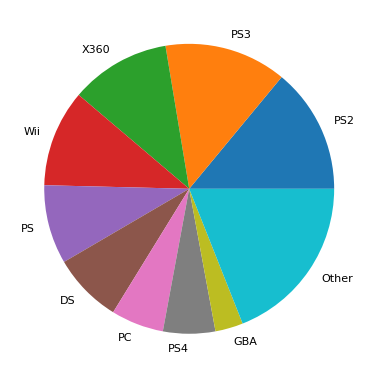

In [ ]:
#Plotting the European market share by %of sales for each platform.
fig=plt.figure(figsize=(18, 6), dpi=80)
sns.color_palette("pastel")
plt.pie(Market_share_top["Per_EU_Sales"],labels=Market_share_top["Platform"])

Plotting North America sales for each platform

([<matplotlib.patches.Wedge at 0x7f31a663e450>,
 [Text(0.999825407159415, 0.4586383708309961, 'X360'),
  Text(0.3186075691909528, 1.052848145201497, 'PS2'),
  Text(-0.5056581548831511, 0.9768878289753473, 'Wii'),
  Text(-0.9868583222972254, 0.48591218518648605, 'PS3'),
  Text(-1.0948784397375058, -0.10602453582999197, 'DS'),
  Text(-0.901651715134848, -0.630098551493643, 'PS'),
  Text(-0.6090246396038231, -0.9160180065672473, 'GBA'),
  Text(-0.3456085104758187, -1.0442962977463275, 'XB'),
  Text(-0.0956788625339326, -1.095830988457715, 'N64'),
  Text(0.7825285864097334, -0.7730776231734977, 'Other')])

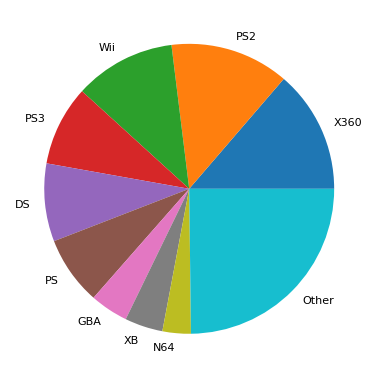

In [ ]:
#Grouping the lesser significant % market shares as others for clearer visualizations
Market_share_top = Market_share[["Platform","Per_NA_Sales"]].sort_values("Per_NA_Sales",ascending = False).head(9)
x=100-Market_share_top["Per_NA_Sales"].sum()
Market_share_top.loc[1] = ["Other",x]
Market_share_top
#Plotting the European market share by % of sales for each platform.
fig=plt.figure(figsize=(18, 6), dpi=80)
sns.color_palette("pastel")
plt.pie(Market_share_top["Per_NA_Sales"],labels=Market_share_top["Platform"])


Plotting Japan sales for each platform

([<matplotlib.patches.Wedge at 0x7f31a65ae750>,
 [Text(1.0020816246234188, 0.45368757707489626, 'DS'),
  Text(0.4100138835483502, 1.0207294525473438, 'PS'),
  Text(-0.3184177090288815, 1.05290558103602, 'PS2'),
  Text(-0.8704488571980908, 0.6725464943054404, 'SNES'),
  Text(-1.090452692550752, 0.144613019153931, '3DS'),
  Text(-1.0330094577379199, -0.37800986789237245, 'NES'),
  Text(-0.7696956285888681, -0.7858553552220583, 'GB'),
  Text(-0.4026129481243616, -1.023671243125746, 'PS3'),
  Text(0.005913174172069187, -1.0999841064175477, 'PSP'),
  Text(0.8485451101670313, -0.6999794254202197, 'Other')])

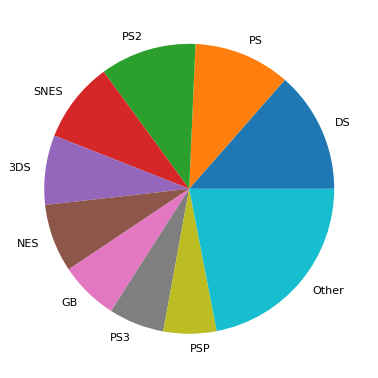

In [ ]:
#Grouping the lesser significant % market shares as others for clearer visualizations
Market_share_top = Market_share[["Platform","Per_JP_Sales"]].sort_values("Per_JP_Sales",ascending = False).head(9)
x=100-Market_share_top["Per_JP_Sales"].sum()
Market_share_top.loc[1] = ["Other",x]
Market_share_top
#Plotting the European market share by % of sales for each platform.
fig=plt.figure(figsize=(18, 6), dpi=80)
sns.color_palette("pastel")
plt.pie(Market_share_top["Per_JP_Sales"],labels=Market_share_top["Platform"])


**Plotting Sales for each platform by Bar Charts**

Bar Plot of top 15 platform's Market share in Japan

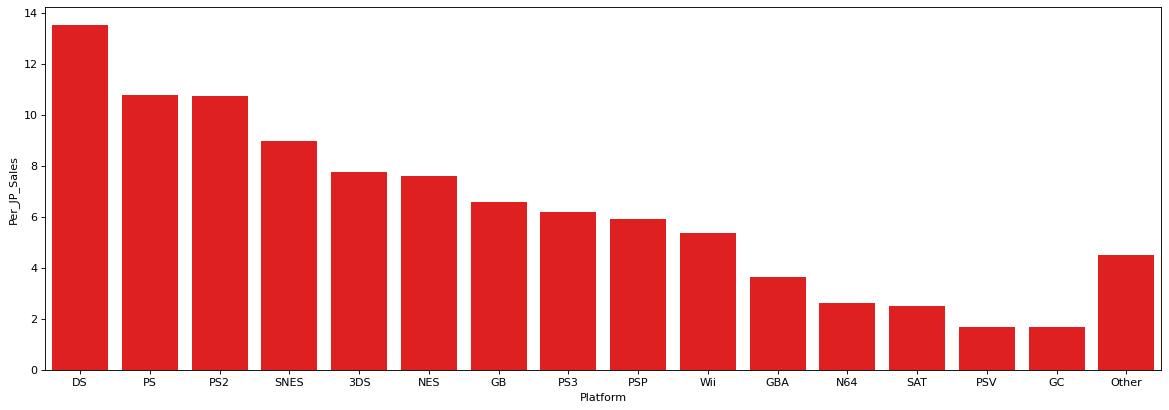

In [ ]:
#Grouping the lesser significant % market shares as others for clearer visualizations
Market_share_top = Market_share[["Platform","Per_JP_Sales"]].sort_values("Per_JP_Sales",ascending = False).head(15)
x=100-Market_share_top["Per_JP_Sales"].sum()
Market_share_top.loc[1] = ["Other",x]
Market_share_top
#Plotting the European market share by % of sales for each platform.
fig=plt.figure(figsize=(18, 6), dpi=80)
sns.color_palette("coolwarm_r")
sns.barplot(x=Market_share_top["Platform"],y=Market_share_top["Per_JP_Sales"],color="red")


Bar Plot of top 15 platform's Market share in North America

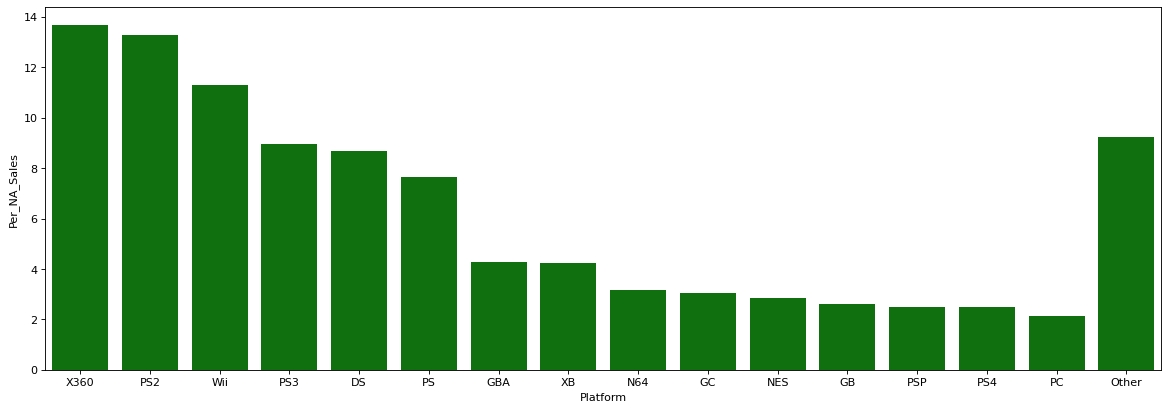

In [ ]:
#Grouping the lesser significant % market shares as others for clearer visualizations
Market_share_top = Market_share[["Platform","Per_NA_Sales"]].sort_values("Per_NA_Sales",ascending = False).head(15)
x=100-Market_share_top["Per_NA_Sales"].sum()
Market_share_top.loc[1] = ["Other",x]
Market_share_top
#Plotting the European market share by % of sales for each platform.
fig=plt.figure(figsize=(18, 6), dpi=80)
sns.color_palette("coolwarm_r")
sns.barplot(x=Market_share_top["Platform"],y=Market_share_top["Per_NA_Sales"],color="green")


Bar Plot of top 15 platform's Market share in Europe

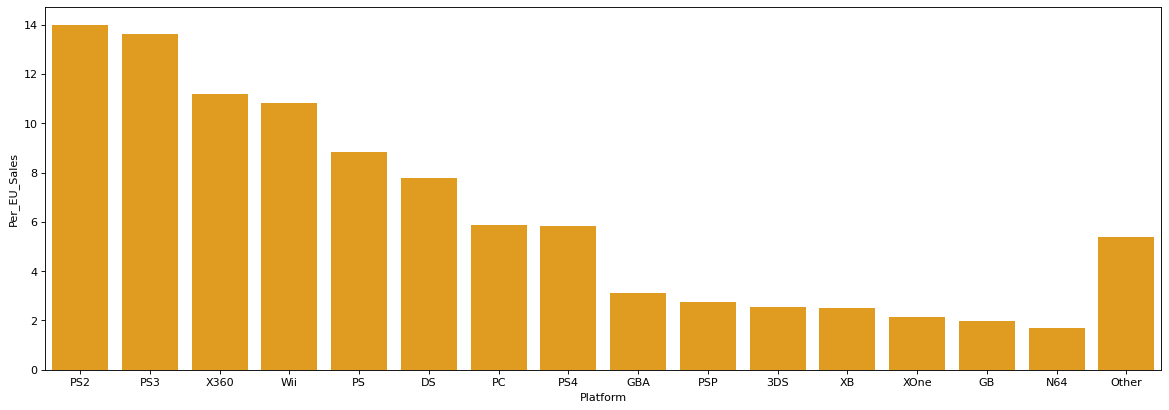

In [ ]:
#Grouping the lesser significant % market shares as others for clearer visualizations
Market_share_top = Market_share[["Platform","Per_EU_Sales"]].sort_values("Per_EU_Sales",ascending = False).head(15)
x=100-Market_share_top["Per_EU_Sales"].sum()
Market_share_top.loc[1] = ["Other",x]
Market_share_top
#Plotting the European market share by % of sales for each platform.
fig=plt.figure(figsize=(18, 6), dpi=80)
sns.color_palette("coolwarm_r")
sns.barplot(x=Market_share_top["Platform"],y=Market_share_top["Per_EU_Sales"],color="orange")


In [ ]:
train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Developer,Rating,Sales_Distribution
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,8.0,Nintendo,E,30+
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,75.525806,8.1,Unknown,N,30+
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,8.3,Nintendo,E,30+
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,8.0,Nintendo,E,30+
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,75.525806,8.1,Unknown,N,30+


In [ ]:
new_df = (train.groupby("Publisher")["Platform"].transform("max"))

new_df.head()

0    WiiU
1    WiiU
2    WiiU
3    WiiU
4    WiiU
Name: Platform, dtype: object

In [ ]:
Publisher_rating = train.groupby("Publisher").agg({"Platform":"count"}).reset_index()
Publisher_rating_top=Publisher_rating.sort_values("Platform",ascending=False).head(10)
Publisher_rating_top



,Publisher,Platform
139,Electronic Arts,1356
21,Activision,985
349,Namco Bandai Games,939
529,Ubisoft,933
277,Konami Digital Entertainment,834
492,THQ,715
361,Nintendo,706
458,Sony Computer Entertainment,687
448,Sega,638
498,Take-Two Interactive,422


In [ ]:
Publisher_rating_top=Publisher_rating.sort_values("Platform",ascending=False).head(10)
Publisher_rating_top
#Plotting the Platform used % of sales for each Publisher.
fig=plt.figure(figsize=(18, 6), dpi=80)
sns.color_palette("coolwarm_r")
sns.barplot(x=Publisher_rating_top["Publisher"],y=Publisher_rating_top["Platform"],color="green")

In [ ]:
train["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
Genre_rating = train.groupby("Genre").agg({"Critic_Score":"count"}).reset_index()
Genre_rating_top=Genre_rating.sort_values("Critic_Score",ascending=False).head()
Genre_rating_top

,Genre,Critic_Score
0,Action,3370
10,Sports,2348
3,Misc,1750
7,Role-Playing,1500
8,Shooter,1323


In [ ]:
df=train[train.groupby("Genre")["Critic_Score"].transform("max") == train["Critic_Score"]] 


In [ ]:
train.groupby("Genre")["Critic_Score"].transform("max").unique()

array([98., 97., 96., 90., 93., 92., 94.])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation
  


In [ ]:
df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv',usecols=["Name","Year_of_Release","Genre","Global_Sales"])
df.shape


(16719, 4)

In [ ]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
colors = dict(zip(['Sports','Platform','Racing',
                   'Role-Playing','Shooter',
                   'Misc','Simulation','Action','Fighting','Adventure','Strategy','Puzzle','nan'],
                    ['#adb0ff', '#ffb3ff', '#90d595',
                     '#e48381', '#aafbff', '#f7bb5f', 
                     '#eafb50','#adb0ff','#ffb3ff','#90d595','#e48381','#aafbff', '#f7bb5f']))
  
group_lk = df.set_index('Name')['Genre'].to_dict()
  
def draw_barchart(year):
    dff = df[df['Year_of_Release'].eq(year)].sort_values(by='Global_Sales',ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Name'], dff['Global_Sales'],
            color=[colors[group_lk[x]] for x in dff['Name']])
    dx = dff['Global_Sales'].max() / 200
      
    for i, (Global_Sales, Name) in enumerate(zip(dff['Global_Sales'],
                                          dff['Name'])):
        ax.text(Global_Sales-dx, i,Name,size=14, weight=600,ha='right', va='bottom')
        ax.text(Global_Sales-dx, i-.25, group_lk[Name], size=10, color='#444444', 
                ha='right', va='baseline')
        ax.text(Global_Sales+dx, i,     f'{Global_Sales:,.0f}', 
                size=14, ha='left',  va='center')
          
    # polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, 
            color='#777777', size=46, ha='right',
            weight=800)
    ax.text(0, 1.06, 'Global_Sales (Millions)',
            transform=ax.transAxes, size=12,
            color='#777777')
      
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most popular Games according to Genre throughtout the world from 1980-2017',
            transform=ax.transAxes, size=24, weight=600, ha='left')
      
    ax.text(1, 0, 'by Saswati and Vishal', 
            transform=ax.transAxes, ha='right', color='#777777', 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    plt.show()
  


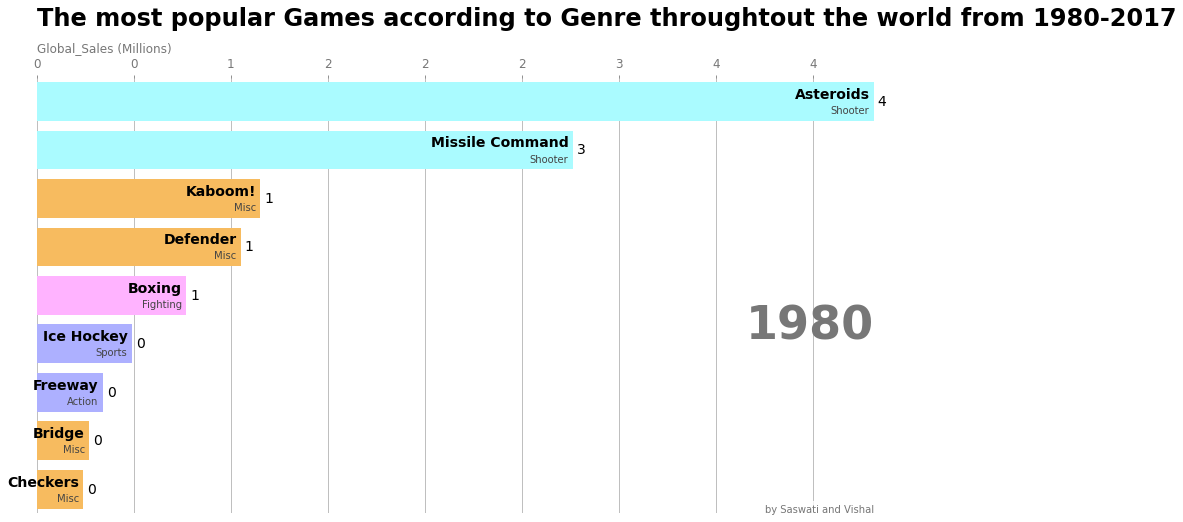

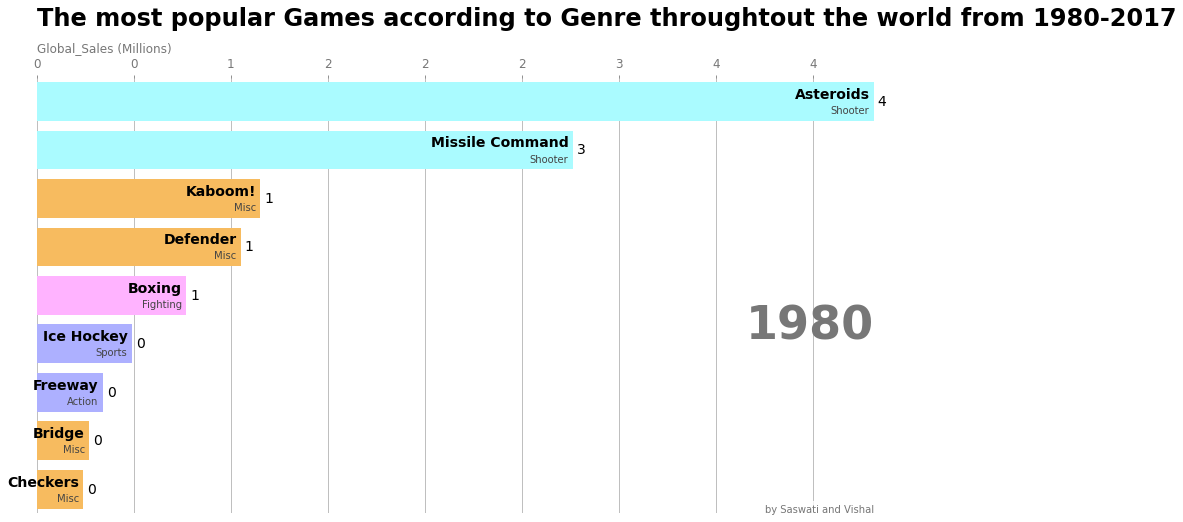

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = FuncAnimation(fig, draw_barchart,frames = range(1980, 2017))
plt.show()


In [ ]:
animator